In [286]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import pathlib
import spacy
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras import layers
import keras

In [287]:
# Loading the dataset 
data_dir = pathlib.Path('/home/lv11/Documents/ProyectosPython/sentimentAnalysis/train')
nf = pd.read_csv(data_dir / 'tweetsDataset1.csv',skiprows=1,names=['Message','Target'])
#print(nf.head(20))

nlp = English()
stop_words = list(STOP_WORDS)
#print(stop_words)

def spacy_tokenizer(sentence):
    tokens = nlp(sentence)
    tokens = [ word.lemma_.lower().strip() if word.lemma_ != '-PRON-' else word.lower_ for word in tokens ]
    tokens = [ word for word in tokens if word not in stop_words and word not in punctuation ]
    return tokens

In [288]:
vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(nf['Message'])
#print(vectorizer.vocabulary_)

vectorizer.transform(nf['Message']).toarray()

messages = nf['Message']
labels = nf['Target']

In [289]:
x_train, x_test, y_train, y_test = train_test_split(messages,labels,test_size=0.25,random_state=1000,shuffle=True)

len(x_train)
len(x_test)

576

In [311]:
vectorizer.fit(x_train)
X_train = vectorizer.transform(x_train).toarray()
X_test = vectorizer.transform(x_test).toarray()

In [312]:
features = 3749 #1549 #1998 #2817 #3603 #3749
shufle = True
drop = 0.5
layer1 = 412 #512
layer2 = 156 #256
epoch = 3
lr = 0.002
epsilon = 1e-9
validation = 0.1

In [313]:
model = Sequential()
model.add(layers.Dense(layer1, input_dim=features, activation='relu'))
model.add(layers.Dropout(drop))
model.add(layers.Dense(layer2,activation='sigmoid'))
model.add(layers.Dropout(drop))
model.add(layers.Dense(3,activation='softmax'))

In [314]:
optimizer = keras.optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999, epsilon=epsilon,decay=0.0,amsgrad=False)

In [315]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 412)               1545000   
_________________________________________________________________
dropout_43 (Dropout)         (None, 412)               0         
_________________________________________________________________
dense_65 (Dense)             (None, 156)               64428     
_________________________________________________________________
dropout_44 (Dropout)         (None, 156)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 3)                 471       
Total params: 1,609,899
Trainable params: 1,609,899
Non-trainable params: 0
_________________________________________________________________


In [316]:
history = model.fit(np.array(X_train),y_train,batch_size=32,epochs=epoch,verbose=1,validation_split=validation,shuffle=shufle)

Train on 1554 samples, validate on 173 samples
Epoch 1/3
1554/1554 [==============================] - 3s 2ms/step - loss: 0.5558 - accuracy: 0.7040 - val_loss: 0.2206 - val_accuracy: 0.8728
Epoch 2/3
1554/1554 [==============================] - 2s 1ms/step - loss: 0.1511 - accuracy: 0.9311 - val_loss: 0.2135 - val_accuracy: 0.8960
Epoch 3/3
1554/1554 [==============================] - 2s 1ms/step - loss: 0.0595 - accuracy: 0.9839 - val_loss: 0.2206 - val_accuracy: 0.8902


In [317]:
pred = model.predict(X_test)

In [318]:
xtest = [x for x in x_test]
for i in range(len(pred)):
    sent = (1 if pred[i][1] > 0.5 else 0)
    print("tweet=",xtest[i], " || prediction=",sent)

 snap chat unhappy   || prediction= 0
tweet=  it's just got 3 years longer unhappy     || prediction= 0
tweet= so sorry I havent been checking my tweets unhappy  We are all here for you!  || prediction= 0
tweet= Alright. Looks like back to chores behind the scenes. My page hits drop to 1K daily when I don't visit and post. unhappy   || prediction= 0
tweet= come back callie  gabbie d ghost unhappy  i love you both  || prediction= 0
tweet= unhappy  :/ unhappy   feeling sick  || prediction= 0
tweet= same unhappy    || prediction= 0
tweet= Thanks for the recent follow Happy to connect happy  have a great Thursday..10  || prediction= 1
tweet= Koalas are dying of thirst  and it's all because of us unhappy  .8  || prediction= 0
tweet= Definitely my arms unhappy  .14  || prediction= 0
tweet= unhappy  oh man..  || prediction= 0
tweet= good crying with joy  i love you so much  || prediction= 1
tweet= Guess who's not getting a unicorn frappuccino because they're sold out unhappy .1  || prediction

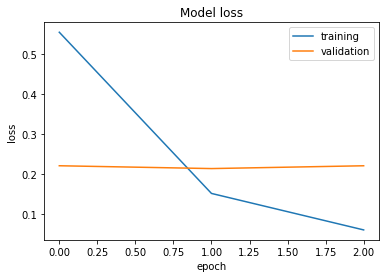

In [319]:
plt.title('Model loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training','validation'],loc='upper right')
plt.show()

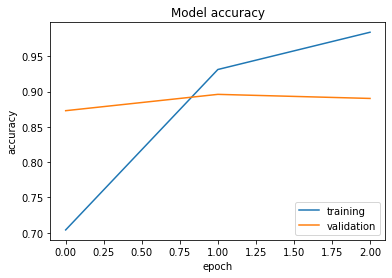

In [320]:
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc='lower right')
plt.show()

In [321]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print("test loss:", test_loss)
print("test accuracy:", test_acc)

576/576 [==============================] - 0s 244us/step
test loss: 0.26363419161902535
test accuracy: 0.8784722089767456
